In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
import seaborn as sns
import scipy.stats as st
import scipy
from scipy.stats import chi2_contingency
from functions import plot_dendrogram
from sklearn import preprocessing
from sklearn import decomposition
from functions import *
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import ks_2samp
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from statsmodels.tools import add_constant
import sklearn.metrics as metrics

### Table of Contents

* [I.Nettoyage de données](#chapter1)
* [II. Mission 0](#chapter2)
    * [1) Analyses univariées](#section_2_1)
    * [2) Analyses bivariées](#section_2_2)
* [III. Mission 1](#chapter3)
    * [1) Analyse de l'éboulis des valeurs propres](#section_3_1)
    * [2) Représentation des variables par le cercle des corrélations](#section_3_2)
    * [3) Représentation des individus par les plans factoriels](#section_3_3)
    * [4) Analyser de la qualité de représentation et la contribution des individus](#section_3_4)
* [IV. Mission 2](#chapter4)
    * [1) Application d'un algorithme de classification / Le K-means](#section_4_1)
    * [2) Test de comparaison](#section_4_2) 
* [V. Mission 3](#chapter5)
    * [1) Regression logistique](#section_5_1)
    * [2) Prédictions](#section_5_2)
    * [3) Programme](#section_5_3)

## I. Nettoyage de données <a class="anchor" id="section_1"></a>

In [2]:
notes = pd.read_csv("notes.csv")
notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [3]:
notes.describe(include='all')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,170,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,NaN,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,NaN,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,NaN,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,NaN,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,NaN,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500


In [4]:
notes = notes.dropna()
notes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


Nous pouvons constater que ce jeu de donnés est propre et exploitable en l'état d'origine.

## II. Mission 0 <a class="anchor" id="section_2"></a>

### 1) Analyses univariées <a class="anchor" id="section_2_1"></a>

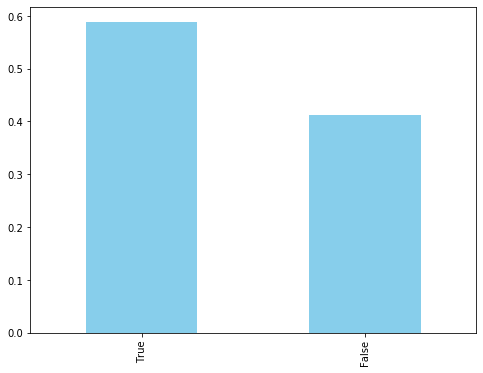

In [5]:
plt.figure(figsize=(8, 6))
notes["is_genuine"].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.show()

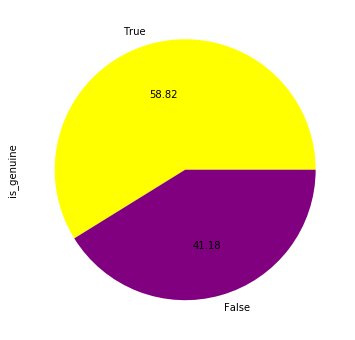

In [6]:
notes["is_genuine"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), colors = ['yellow', 'purple'], autopct = '%.2f')
plt.show()

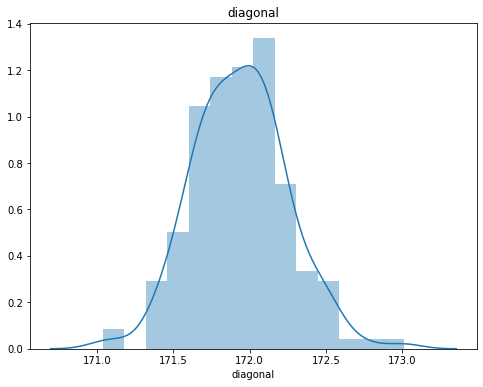

0    172.1
dtype: float64

In [7]:
plt.figure(figsize=(8, 6))
sns.distplot(notes["diagonal"]).set_title("diagonal")
plt.show()
notes['diagonal'].mode()

In [8]:
ks_2samp(notes["diagonal"],list(np.random.normal(np.mean(notes["diagonal"]), np.std(notes["diagonal"]), 1000)))

Ks_2sampResult(statistic=0.0758235294117647, pvalue=0.3539463495699199)

pvalue > 0,05 -> 5% -> On ne peut donc pas rejeter l’hypothèse de normalité au niveau de test 5%

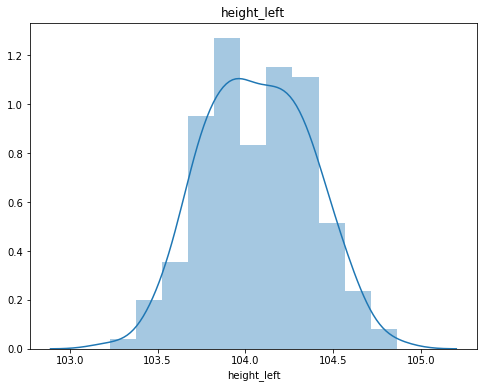

0    104.17
1    104.32
dtype: float64

In [9]:
plt.figure(figsize=(8, 6))
sns.distplot(notes["height_left"]).set_title("height_left")
plt.show()
notes['height_left'].mode()

In [10]:
ks_2samp(notes["height_left"],list(np.random.normal(np.mean(notes["height_left"]), np.std(notes["height_left"]), 1000)))

Ks_2sampResult(statistic=0.05617647058823529, pvalue=0.7246542484481846)

pvalue > 0,05 -> 5% -> On ne peut donc pas rejeter l’hypothèse de normalité au niveau de test 5%

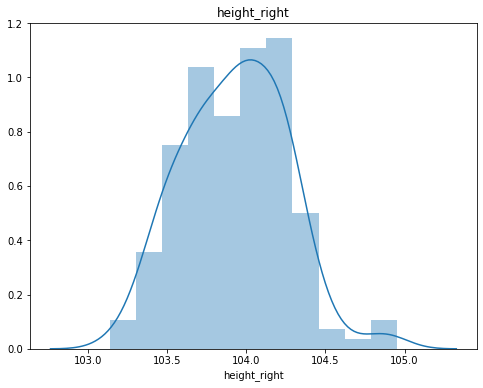

0    103.76
1    104.06
dtype: float64

In [11]:
plt.figure(figsize=(8, 6))
sns.distplot(notes["height_right"]).set_title("height_right")
plt.show()
notes['height_right'].mode()

In [12]:
ks_2samp(notes["height_right"],list(np.random.normal(np.mean(notes["height_right"]), np.std(notes["height_right"]), 1000)))

Ks_2sampResult(statistic=0.06705882352941177, pvalue=0.506846095750425)

pvalue > 0,05 -> 5% -> On ne peut donc pas rejeter l’hypothèse de normalité au niveau de test 5%

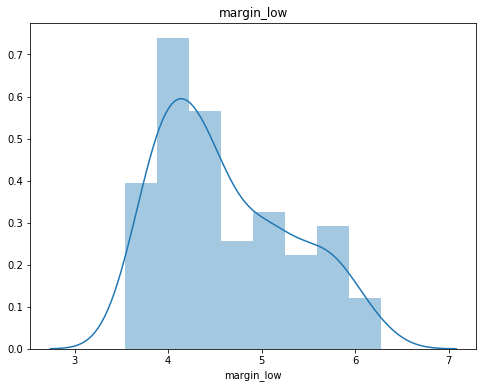

In [13]:
plt.figure(figsize=(8, 6))
sns.distplot(notes["margin_low"]).set_title("margin_low")
plt.show()

In [14]:
ks_2samp(notes["margin_low"],list(np.random.normal(np.mean(notes["margin_low"]), np.std(notes["margin_low"]), 1000)))

Ks_2sampResult(statistic=0.105, pvalue=0.0749828829556004)

pvalue < 0,05 -> 5% -> On peut donc rejeter l’hypothèse de normalité au niveau de test 5%

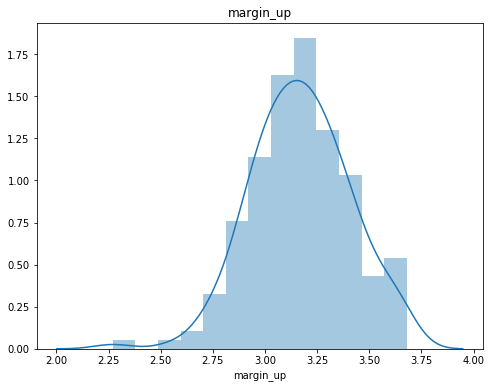

In [15]:
plt.figure(figsize=(8, 6))
sns.distplot(notes["margin_up"]).set_title("margin_up")
plt.show()

In [16]:
ks_2samp(notes["margin_up"],list(np.random.normal(np.mean(notes["margin_up"]), np.std(notes["margin_up"]), 1000)))

Ks_2sampResult(statistic=0.03835294117647059, pvalue=0.9768998715849286)

pvalue < 0,05 -> 5% -> On peut donc rejeter l’hypothèse de normalité au niveau de test 5%

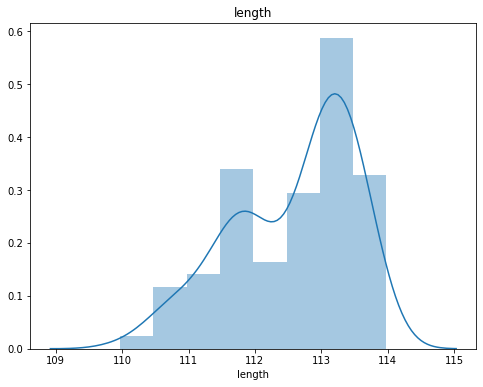

In [17]:
plt.figure(figsize=(8, 6))
sns.distplot(notes["length"]).set_title("length")
plt.show()

In [18]:
ks_2samp(notes["length"],list(np.random.normal(np.mean(notes["length"]), np.std(notes["length"]), 1000)))

Ks_2sampResult(statistic=0.12211764705882353, pvalue=0.02382794144730227)

pvalue > 0,05 -> 5% -> On ne peut donc pas rejeter l’hypothèse de normalité au niveau de test 5%

## 2) Analyses bivariées <a class="anchor" id="section_2_2"></a>

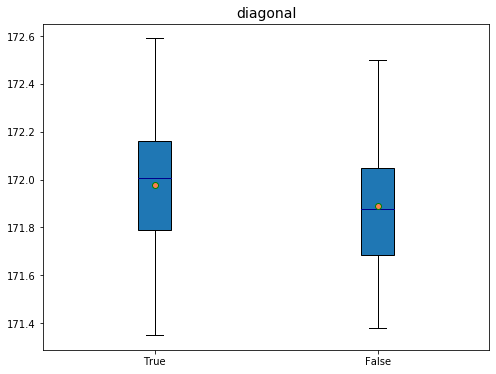

In [19]:
X = "is_genuine" # qualitative
Y = "diagonal" # quantitative

modalites = notes[X].unique()
groupes = []
for m in modalites:
    groupes.append(notes[notes[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('diagonal',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [20]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(notes[X],notes[Y])

0.019383108567093802

Le calcul d'Eta carré étant inférieur à 0,06 nous ne pouvons pas établir une corrélation entre la variable diagonal et la variable is genuine.

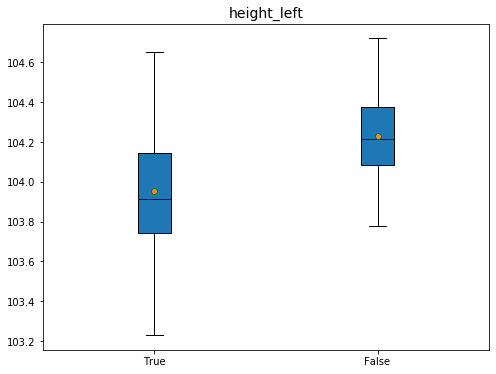

In [21]:
Z = "height_left" # quantitative

modalites = notes[X].unique()
groupes = []
for m in modalites:
    groupes.append(notes[notes[X]==m][Z])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('height_left',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [22]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(notes[X],notes[Z])

0.21319458315018705

Le calcul d'Eta carré étant supérieur à 0,12, nous pouvons établir une forte correlation la variable height_left et la variable is genuine.

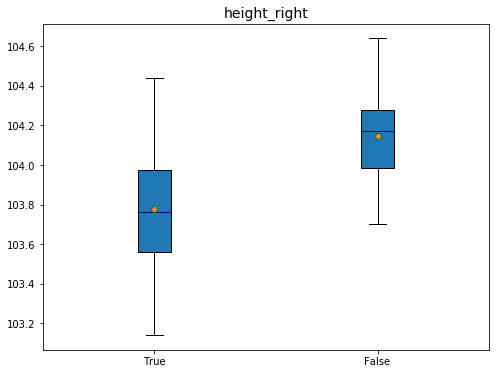

In [23]:
A = "height_right" # quantitative

modalites = notes[X].unique()
groupes = []
for m in modalites:
    groupes.append(notes[notes[X]==m][A])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('height_right',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [24]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(notes[X],notes[A])

0.30394154672012125

Le calcul d'Eta carré étant supérieur à 0,12, nous pouvons établir une forte correlation entre la variable height_right et la variable is genuine.


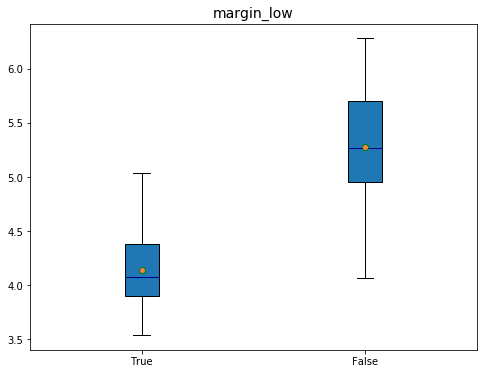

In [25]:
B = "margin_low" # quantitative

modalites = notes[X].unique()
groupes = []
for m in modalites:
    groupes.append(notes[notes[X]==m][B])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('margin_low',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [26]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(notes[X],notes[B])

0.640177214288775

Le calcul d'Eta carré étant supérieur à 0,12, nous pouvons établir une forte correlation entre la variable margin_low et is_genuine.


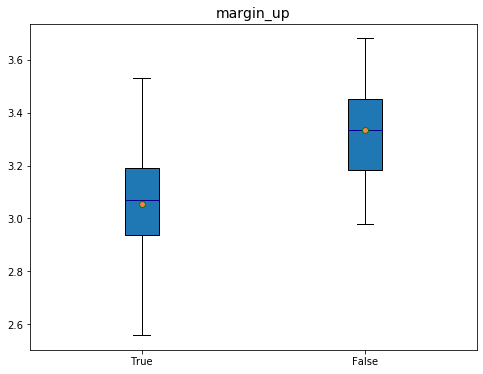

In [27]:
C = "margin_up" # quantitative

modalites = notes[X].unique()
groupes = []
for m in modalites:
    groupes.append(notes[notes[X]==m][C])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('margin_up',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [28]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(notes[X],notes[C])

0.3396567096032002

Le calcul d'Eta carré étant supérieur à 0,12, nous pouvons établir une forte correlation entre la variable margin_up et la variable is genuine.


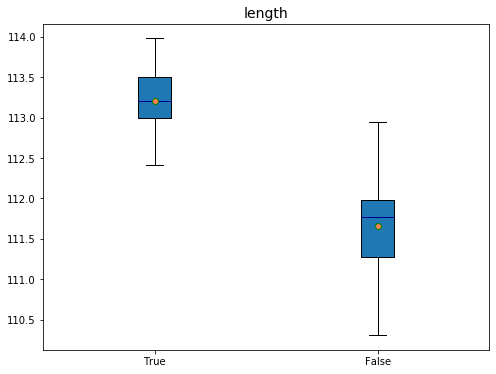

In [29]:
D = "length" # quantitative

modalites = notes[X].unique()
groupes = []
for m in modalites:
    groupes.append(notes[notes[X]==m][D])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('length',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [30]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(notes[X],notes[D])

0.6818507654957807

Le calcul d'Eta carré étant supérieur à 0,12, nous pouvons établir une forte correlation entre la variable length et is_genuine.

## III. Mission 1 <a class="anchor" id="section_3"></a>

### 1) Analyse de l'éboulis des valeurs propres <a class="anchor" id="section_3_1"></a>

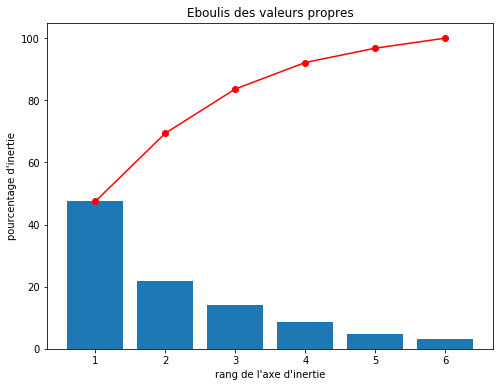

In [31]:
mesure = notes.drop(["is_genuine"], axis=1)

# préparation des données pour le clustering
X = mesure.values
names = mesure.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# choix du nombre et des composantes à calculer
n_comp = 6
features = mesure.columns

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
plt.figure(figsize=(8, 6))
display_scree_plot(pca)

Les deux premières composantes représentent 70% de l'inertie totale. Nous pouvons donc nous contenter d'étudier la projection sur le premier plan factoriel.

### 2) Représentation des variables par le cercle des corrélations <a class="anchor" id="section_3_2"></a> 

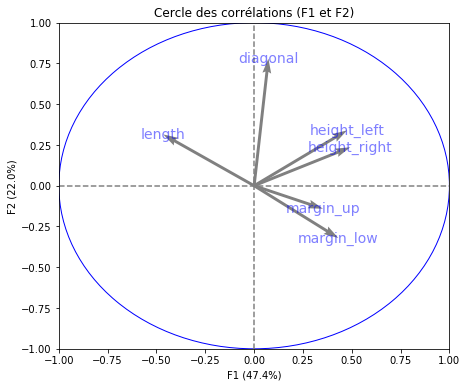

In [32]:
# Cercle des corrélations

pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

L'axe des abscisses représente l'axe de l'authenticité. 5 des variables y sont corrélées.

### 3) Représentation des individus par les plans factoriels <a class="anchor" id="section_3_3"></a> 

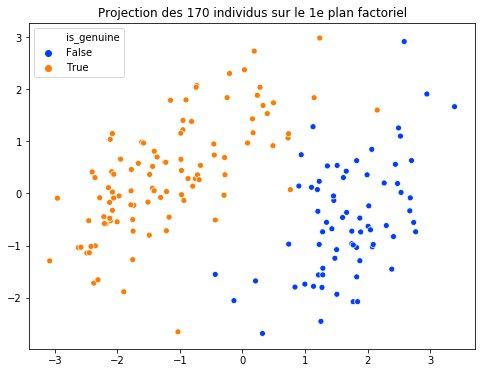

In [33]:
# Affichage du clustering par projection des individus sur le premier plan factoriel

clusters = notes['is_genuine']
X_projected = pca.transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(X_projected[:, 0], X_projected[:, 1], hue=clusters, cmap = 'jet', palette="bright")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

### 4) Analyser de la qualité de la représentation et la contribution des individus <a class="anchor" id="section_3_4"></a> 

In [34]:
#contribution des individus dans l'inertie totale

X_données = np.sum(X_scaled**2,axis=1)
contribution = pd.DataFrame({'billet':mesure.index,'contribution':X_données})
contribution = contribution.sort_values(by = 'contribution', ascending = False)
contribution

,billet,contribution
166,166,20.625650
0,0,18.410598
4,4,18.039567
122,122,16.790944
39,39,15.052608
...,...,...
59,59,1.484454
76,76,1.435202
85,85,1.431664
98,98,0.878319


In [35]:
#nombre d'observations
n = mesure.shape[0]

#instanciation
acp = PCA(svd_solver='full')

#calculs
coord = acp.fit_transform(X_scaled)

#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_

#contributions aux axes
ctr = coord**2
for j in range(n_comp):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

contribution_axes = pd.DataFrame({'id':mesure.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
contribution_axes['CTR_TOT'] = contribution_axes['CTR_1'] + contribution_axes['CTR_2']
contribution_axes = contribution_axes.sort_values(by = 'CTR_1', ascending = False)
contribution_axes

,id,CTR_1,CTR_2,CTR_TOT
122,122,0.023758,0.012372,0.036131
49,49,0.019620,0.007487,0.027108
29,29,0.018089,0.000038,0.018126
112,112,0.017950,0.016259,0.034209
158,158,0.015836,0.002423,0.018259
...,...,...,...,...
78,78,0.000059,0.006047,0.006106
12,12,0.000053,0.009140,0.009193
152,152,0.000038,0.018910,0.018948
27,27,0.000014,0.004179,0.004193


In [36]:
contribution_axes = contribution_axes.sort_values(by = 'CTR_2', ascending = False)
contribution_axes

,id,CTR_1,CTR_2,CTR_TOT
5,5,0.003155,0.039736,0.042891
166,166,0.013811,0.037927,0.051737
34,34,0.000073,0.033302,0.033375
156,156,0.000211,0.032264,0.032475
70,70,0.002197,0.031516,0.033713
...,...,...,...,...
16,16,0.003041,0.000006,0.003047
35,35,0.000180,0.000005,0.000186
31,31,0.008929,0.000003,0.008932
80,80,0.001956,0.000003,0.001959


In [37]:
contribution_axes = contribution_axes.sort_values(by = 'CTR_TOT', ascending = False)
contribution_axes

,id,CTR_1,CTR_2,CTR_TOT
166,166,0.013811,0.037927,0.051737
5,5,0.003155,0.039736,0.042891
122,122,0.023758,0.012372,0.036131
112,112,0.017950,0.016259,0.034209
70,70,0.002197,0.031516,0.033713
...,...,...,...,...
72,72,0.001306,0.000087,0.001393
76,76,0.000987,0.000307,0.001294
69,69,0.001211,0.000024,0.001235
43,43,0.000162,0.000572,0.000734


In [38]:
Total_CTR_1 = contribution_axes['CTR_1'].sum()
Total_CTR_2 = contribution_axes['CTR_2'].sum()

print ("Total_CTR_1",Total_CTR_1)
print ("Total_CTR_2",Total_CTR_2)

Total_CTR_1 1.0000000000000009
Total_CTR_2 0.9999999999999997


Nous pouvons donc constater qu'il n'y a pas de valeur extreme au niveau de la contribution des individus sur les deux axes du premier plan factoriel. Le CTR_1 le plus élevé est de 0.023758 soit uniquement 4 fois la valeur théorique de 1/170. Le billet le plus représenté sur l'axe 2 a une valeur de 0.039736 soit 6,7 fois la valeur théorique. 

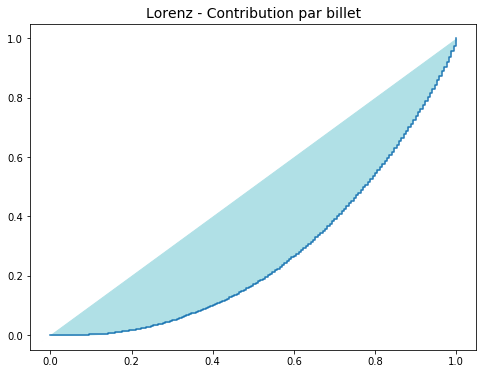

In [39]:
cont = contribution_axes['CTR_1'].values
lorenz = np.cumsum(np.sort(cont)) / cont.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0


plt.figure(figsize=(8, 6))
plt.title('Lorenz - Contribution par billet',fontsize=14) 
xaxis = np.linspace(0,1,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')

plt.fill_between(xaxis,xaxis,lorenz, color='powderblue')
plt.show()

In [40]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.44942622332517224

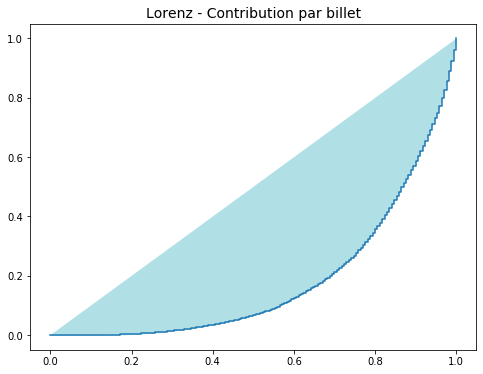

In [41]:
cont = contribution_axes['CTR_2'].values
lorenz = np.cumsum(np.sort(cont)) / cont.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0


plt.figure(figsize=(8, 6))
plt.title('Lorenz - Contribution par billet',fontsize=14) 
xaxis = np.linspace(0,1,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')

plt.fill_between(xaxis,xaxis,lorenz, color='powderblue')
plt.show()

In [42]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.6319230178845875

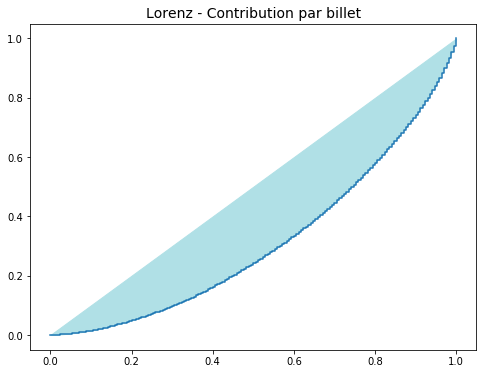

In [43]:
cont = contribution_axes['CTR_TOT'].values
lorenz = np.cumsum(np.sort(cont)) / cont.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0


plt.figure(figsize=(8, 6))
plt.title('Lorenz - Contribution par billet',fontsize=14) 
xaxis = np.linspace(0,1,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')

plt.fill_between(xaxis,xaxis,lorenz, color='powderblue')
plt.show()

In [44]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.3720868169736644

Entre 0 et 1, l'inégalité est d'autant plus forte que l'indice de Gini est élevé. On peut constater que malgré le poids de chacun des individus sur chaque AXE, la répartition générale est équilibrée. 

In [45]:
#qualité de représentation des individus - COS2

cos2 = X_projected**2
for j in range(n_comp):
 cos2[:,j] = cos2[:,j]/X_données
cosinus_CAR = pd.DataFrame({'billet':mesure.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})

cosinus_CAR['COS_TOT'] = cosinus_CAR['COS2_1'] + cosinus_CAR['COS2_2']
cosinus_CAR = cosinus_CAR.sort_values(by = 'COS_TOT', ascending = False)
cosinus_CAR

,billet,COS2_1,COS2_2,COS_TOT
148,148,0.578193,0.410807,0.989001
143,143,0.973456,0.007584,0.981040
46,46,0.962296,0.003343,0.965639
45,45,0.631308,0.331305,0.962613
154,154,0.542732,0.417831,0.960564
...,...,...,...,...
52,52,0.076673,0.106134,0.182807
88,88,0.023273,0.135767,0.159040
160,160,0.068742,0.042901,0.111643
43,43,0.038755,0.063289,0.102043


In [46]:
medians_R = cosinus_CAR['COS_TOT'].median()
medians_R

0.7333683958309807

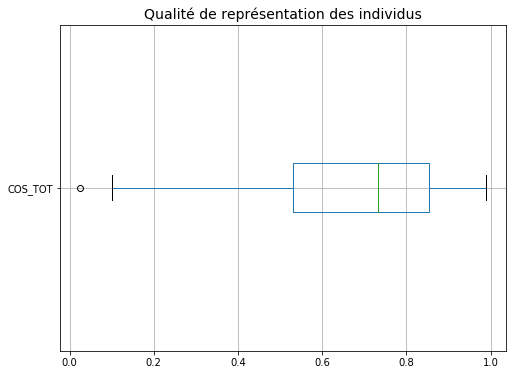

In [47]:
plt.figure(figsize=(8,6))

medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}

plt.title('Qualité de représentation des individus',fontsize=14) 
cosinus_CAR.boxplot(column="COS_TOT", vert=False,showfliers=True)

plt.show()

In [48]:
cosinus_CAR.COS_TOT.describe()

count    170.000000
mean       0.687011
std        0.213613
min        0.025132
25%        0.531490
50%        0.733368
75%        0.854762
max        0.989001
Name: COS_TOT, dtype: float64

In [49]:
#vérifions la théorie - somme en ligne des cos2 = 1

print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [50]:
notes_R = notes.copy()
notes_R['billet'] = notes_R.index

MQR = pd.merge(cosinus_CAR, notes_R, on='billet')
MQR

,billet,COS2_1,COS2_2,COS_TOT,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,148,0.578193,0.410807,0.989001,False,171.67,104.16,104.08,5.42,3.30,111.63
1,143,0.973456,0.007584,0.981040,False,172.00,104.46,104.30,5.27,3.37,111.85
2,46,0.962296,0.003343,0.965639,True,171.85,103.90,103.74,4.13,3.07,113.15
3,45,0.631308,0.331305,0.962613,True,171.44,103.52,103.49,4.09,3.12,113.23
4,154,0.542732,0.417831,0.960564,False,171.62,104.21,103.99,5.50,3.45,111.35
...,...,...,...,...,...,...,...,...,...,...,...
165,52,0.076673,0.106134,0.182807,True,171.59,104.06,103.99,3.93,3.24,112.80
166,88,0.023273,0.135767,0.159040,True,171.91,104.28,103.92,3.64,3.36,113.15
167,160,0.068742,0.042901,0.111643,False,172.50,104.07,103.71,3.82,3.63,110.74
168,43,0.038755,0.063289,0.102043,True,171.91,104.34,103.77,4.45,2.95,112.66


In [51]:
def QR (row):
   if row['COS_TOT'] >= medians_R and row['is_genuine'] == True :
      return 'True_B' 
   if row['COS_TOT'] >= medians_R and row['is_genuine'] == False :
      return 'False_B' 
   if row['COS_TOT'] < medians_R and row['is_genuine'] == False :
      return 'False_M'
   if row['COS_TOT'] < medians_R and row['is_genuine'] == True :
      return 'True_M'

In [52]:
MQR['Représentation'] = MQR.apply (lambda row: QR (row),axis=1)
MQR

,billet,COS2_1,COS2_2,COS_TOT,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Représentation
0,148,0.578193,0.410807,0.989001,False,171.67,104.16,104.08,5.42,3.30,111.63,False_B
1,143,0.973456,0.007584,0.981040,False,172.00,104.46,104.30,5.27,3.37,111.85,False_B
2,46,0.962296,0.003343,0.965639,True,171.85,103.90,103.74,4.13,3.07,113.15,True_B
3,45,0.631308,0.331305,0.962613,True,171.44,103.52,103.49,4.09,3.12,113.23,True_B
4,154,0.542732,0.417831,0.960564,False,171.62,104.21,103.99,5.50,3.45,111.35,False_B
...,...,...,...,...,...,...,...,...,...,...,...,...
165,52,0.076673,0.106134,0.182807,True,171.59,104.06,103.99,3.93,3.24,112.80,True_M
166,88,0.023273,0.135767,0.159040,True,171.91,104.28,103.92,3.64,3.36,113.15,True_M
167,160,0.068742,0.042901,0.111643,False,172.50,104.07,103.71,3.82,3.63,110.74,False_M
168,43,0.038755,0.063289,0.102043,True,171.91,104.34,103.77,4.45,2.95,112.66,True_M


In [53]:
MQR = MQR.drop(["billet", "COS2_1", "COS2_2", "COS_TOT", "is_genuine"], axis=1)
MQR

,diagonal,height_left,height_right,margin_low,margin_up,length,Représentation
0,171.67,104.16,104.08,5.42,3.30,111.63,False_B
1,172.00,104.46,104.30,5.27,3.37,111.85,False_B
2,171.85,103.90,103.74,4.13,3.07,113.15,True_B
3,171.44,103.52,103.49,4.09,3.12,113.23,True_B
4,171.62,104.21,103.99,5.50,3.45,111.35,False_B
...,...,...,...,...,...,...,...
165,171.59,104.06,103.99,3.93,3.24,112.80,True_M
166,171.91,104.28,103.92,3.64,3.36,113.15,True_M
167,172.50,104.07,103.71,3.82,3.63,110.74,False_M
168,171.91,104.34,103.77,4.45,2.95,112.66,True_M


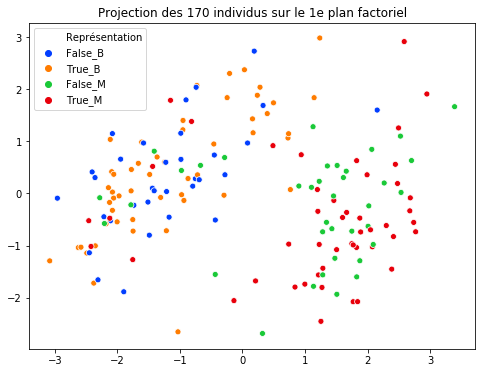

In [54]:
# Affichage du clustering par projection des individus sur le premier plan factoriel

billets = MQR['Représentation']

plt.figure(figsize=(8, 6))
sns.scatterplot(X_projected[:, 0], X_projected[:, 1], hue=billets, cmap = 'jet', palette="bright")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

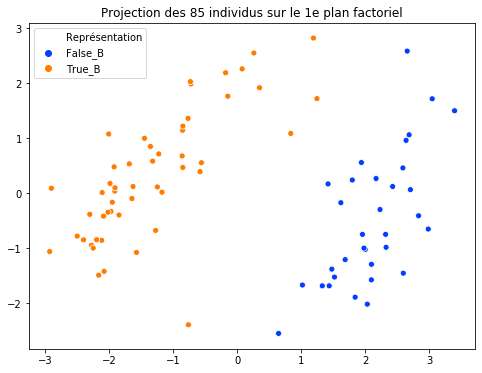

In [55]:
MQR_T = MQR.loc[~MQR["Représentation"].isin(['True_M','False_M'])]
MQR_B = MQR_T.drop(["Représentation"], axis=1)


# préparation des données pour le clustering
X_B = MQR_B.values
names_B = MQR_B.index

# Centrage et Réduction
std_scale_B = preprocessing.StandardScaler().fit(X_B)
X_scaled_B = std_scale_B.transform(X_B)

# Affichage du clustering par projection des individus sur le premier plan factoriel
billets_B = MQR_T['Représentation']
X_projected_B = pca.transform(X_scaled_B)

plt.figure(figsize=(8, 6))
sns.scatterplot(X_projected_B[:, 0], X_projected_B[:, 1], hue=billets_B, cmap = 'jet', palette="bright")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected_B.shape[0]))
plt.show(block=False)

La moitié des billets ont une qualité de représentation supérieure à 73%, on peut donc valider la représentation.

## IV. Mission 2 <a class="anchor" id="section_4"></a>

### 1) Application d'un algorithme de classification / Le K-means <a class="anchor" id="section_4_1"></a> 

In [56]:
# Nombre de clusters souhaités
n_clust = 2

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clustersk = km.labels_
clustersk

mesure_K = mesure.copy()
mesure_K['cluster_k'] = clustersk 
mesure_K

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_k
0,171.81,104.86,104.95,4.52,2.89,112.83,1
1,171.67,103.74,103.70,4.01,2.87,113.29,0
2,171.83,103.76,103.76,4.40,2.88,113.84,0
3,171.80,103.78,103.65,3.73,3.12,113.63,0
4,172.05,103.70,103.75,5.04,2.27,113.55,0
...,...,...,...,...,...,...,...
165,172.11,104.23,104.45,5.24,3.58,111.78,1
166,173.01,104.59,104.31,5.04,3.05,110.91,1
167,172.47,104.27,104.10,4.88,3.33,110.68,1
168,171.82,103.97,103.88,4.73,3.55,111.87,1


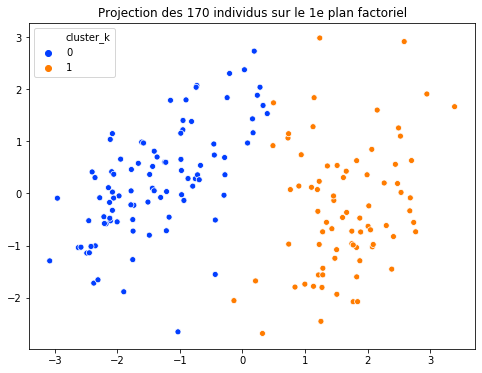

In [57]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
Kmclust = mesure_K['cluster_k']

plt.figure(figsize=(8, 6))
sns.scatterplot(X_projected[:, 0], X_projected[:, 1], hue=Kmclust, cmap = 'jet', palette="bright")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

### 2) Test de comparaison <a class="anchor" id="section_4_2"></a> 

In [58]:
#y (cluster) est la dernière colonne
yTest = mesure_K['cluster_k']
predSm = notes['is_genuine']


#matrice de confusion
mcSm = pd.crosstab(yTest,predSm)
print(mcSm)

is_genuine  False  True 
cluster_k               
0               1     92
1              69      8


In [59]:
rps = pd.merge(mesure_K, notes)
rps

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_k,is_genuine
0,171.81,104.86,104.95,4.52,2.89,112.83,1,True
1,171.67,103.74,103.70,4.01,2.87,113.29,0,True
2,171.83,103.76,103.76,4.40,2.88,113.84,0,True
3,171.80,103.78,103.65,3.73,3.12,113.63,0,True
4,172.05,103.70,103.75,5.04,2.27,113.55,0,True
...,...,...,...,...,...,...,...,...
165,172.11,104.23,104.45,5.24,3.58,111.78,1,False
166,173.01,104.59,104.31,5.04,3.05,110.91,1,False
167,172.47,104.27,104.10,4.88,3.33,110.68,1,False
168,171.82,103.97,103.88,4.73,3.55,111.87,1,False


In [60]:
def RPS (row):
   if row['cluster_k'] == 1 and row['is_genuine'] == True :
      return 'True_OK' 
   if row['cluster_k'] == 0 and row['is_genuine'] == True :
      return 'True_NOK' 
   if row['cluster_k'] == 1 and row['is_genuine'] == False :
      return 'False_NOK'
   if row['cluster_k'] == 0 and row['is_genuine'] == False :
      return 'False_OK'

In [61]:
rps['Représentation'] = rps.apply (lambda row: RPS (row),axis=1)
rps

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster_k,is_genuine,Représentation
0,171.81,104.86,104.95,4.52,2.89,112.83,1,True,True_OK
1,171.67,103.74,103.70,4.01,2.87,113.29,0,True,True_NOK
2,171.83,103.76,103.76,4.40,2.88,113.84,0,True,True_NOK
3,171.80,103.78,103.65,3.73,3.12,113.63,0,True,True_NOK
4,172.05,103.70,103.75,5.04,2.27,113.55,0,True,True_NOK
...,...,...,...,...,...,...,...,...,...
165,172.11,104.23,104.45,5.24,3.58,111.78,1,False,False_NOK
166,173.01,104.59,104.31,5.04,3.05,110.91,1,False,False_NOK
167,172.47,104.27,104.10,4.88,3.33,110.68,1,False,False_NOK
168,171.82,103.97,103.88,4.73,3.55,111.87,1,False,False_NOK


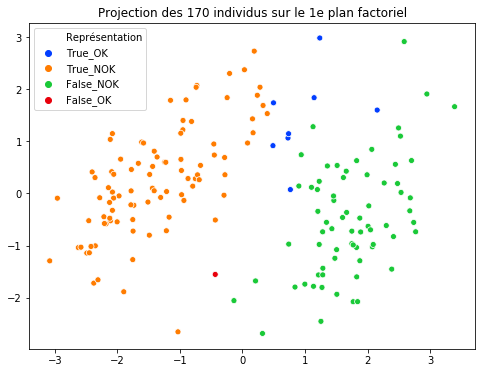

In [62]:
# Affichage du clustering par projection des individus sur le premier plan factoriel
RPS_OK = rps['Représentation']

plt.figure(figsize=(8, 6))
sns.scatterplot(X_projected[:, 0], X_projected[:, 1], hue=RPS_OK, cmap = 'jet', palette="bright")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

On peut constater que le faux billet indiqué comme vrai par la classification du K-means est réellement placé pile entre les deux clusters. 

## V. Mission 3 <a class="anchor" id="section_5"></a>

### 1) Régression logistique<a class="anchor" id="section_5_1"></a> 

In [63]:
notes_L = notes.copy()
notes_L["is_genuine"] = notes_L["is_genuine"].astype(int)
notes_L

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.67,103.74,103.70,4.01,2.87,113.29
2,1,171.83,103.76,103.76,4.40,2.88,113.84
3,1,171.80,103.78,103.65,3.73,3.12,113.63
4,1,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,0,172.11,104.23,104.45,5.24,3.58,111.78
166,0,173.01,104.59,104.31,5.04,3.05,110.91
167,0,172.47,104.27,104.10,4.88,3.33,110.68
168,0,171.82,103.97,103.88,4.73,3.55,111.87


In [64]:
# Séparation de notre dataframe en deux, un échantillon observations de 80% et un échantillon test de 20%

obsv_vf, test = train_test_split(notes_L, test_size=0.20, random_state=42, shuffle=True)

In [65]:
# Methode backward : Je commence avec tout puis j'enlève des variables. Suppression de 'legth' car invalid results -> Perfect separation detected, results not available

reg_log2 = smf.glm('is_genuine ~ diagonal + height_left + height_right + margin_low + margin_up', data=obsv_vf, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                  136
Model:                            GLM   Df Residuals:                      130
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5.5123
Date:                Mon, 12 Apr 2021   Deviance:                       11.025
Time:                        07:50:30   Pearson chi2:                     9.91
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      509.8405    635.208      0.803   

### 2) Prédictions <a class="anchor" id="section_5_2"></a> 

In [66]:
# Données test sans la variable binaire 
XTest = test.drop(["is_genuine"], axis=1)
YTest = test["is_genuine"]

# Données d'observation sans la variable binaire 
Xobsv_vf = obsv_vf.drop(["is_genuine"], axis=1)
Yobsv_vf = obsv_vf["is_genuine"]

# Calcul de la prédiction sur l'échantillon test
predProbaSm = reg_log2.predict(XTest)

In [67]:
# Convertir en prédiction brute
predSm = np.where(predProbaSm > 0.5, 1, 0)
print(np.unique(predSm,return_counts=True))

(array([0, 1]), array([12, 22]))


In [68]:
# Ajout de la colonne prediction
XTest['predict'] = predSm 
XTest['probabilité predict'] = predProbaSm
XTest

,diagonal,height_left,height_right,margin_low,margin_up,length,predict,probabilité predict
139,171.60,104.37,104.20,5.82,3.08,112.84,0,2.726214e-10
30,172.19,104.05,103.81,3.90,3.22,113.52,1,9.999920e-01
119,171.51,104.13,103.90,4.99,3.60,111.23,0,3.474460e-11
29,171.84,103.75,103.38,4.08,2.70,113.72,1,1.000000e+00
144,171.56,103.80,103.87,5.66,2.98,112.95,0,3.668973e-08
163,171.78,104.07,104.16,5.77,3.30,111.27,0,1.494834e-14
166,173.01,104.59,104.31,5.04,3.05,110.91,0,4.024014e-04
51,172.22,104.48,104.06,4.59,2.91,112.82,1,9.999691e-01
105,171.99,104.18,104.20,5.26,3.23,111.83,0,1.314598e-08
60,172.11,103.67,103.43,4.19,2.98,113.09,1,9.999989e-01


In [79]:
# Matrice de confusion
mcSm = pd.crosstab(YTest,predSm)
print(mcSm)


col_0        0   1
is_genuine        
0           12   0
1            0  22


100% de prédictions justes. On ne peut pas dire que le modèle est parfait mais juste que l'échantillon est peut-être trop petit.


In [87]:
VN = mcSm[0].values[0]
FN = mcSm[0].values[1]
FP = mcSm[1].values[0]
VP = mcSm[1].values[1]


Vrai négatif (VN) Faux positif (FP)  
Faux négatif (FN) Vrai positif (VP)

In [88]:
# La sensibilité, le taux de positifs classés positifs, vaut : VP / (VP + FN)

sens = VP / (VP + FN)
sens

1.0

In [89]:
# La spécificité, le taux de négatifs classés négatifs, vaut : VN / (FP + VN)

spéc = VN / (FP + VN)
spéc

1.0

In [90]:
#transformer en matrice Numpy
mcSmNumpy = mcSm.values

#taux de reconnaissance
accSm = np.sum(np.diagonal(mcSmNumpy))/np.sum(mcSmNumpy)
print("Taux de reconnaissance : %.4f" % (accSm))

#taux d'erreur
errSm = 1.0 - accSm
print("Taux d'erreur' : %.4f" % (errSm))

Taux de reconnaissance : 1.0000
Taux d'erreur' : 0.0000


In [91]:
# Rapport sur la qualité de prédiction
print(metrics.classification_report(YTest,predSm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        22

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



### 3) Programme <a class="anchor" id="section_5_3"></a> 

In [92]:
test = pd.read_csv("example.csv")
obsv_vf = pd.read_csv("notes.csv")
obsv_vf["is_genuine"] = obsv_vf["is_genuine"].astype(int)
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [96]:
# Methode backward : Je commence avec tout puis j'enlève des variables. Suppression de 'legth' car invalid results -> Perfect separation detected, results not available
reg_log2 = smf.glm('is_genuine ~ diagonal + height_left + height_right + margin_low + margin_up', data=obsv_vf, family=sm.families.Binomial()).fit()

# Données test sans la variable binaire 
id = test['id']
XTest = test.drop(["id"], axis=1)

# Données d'observation sans la variable binaire 
Xobsv_vf = obsv_vf.drop(["is_genuine"], axis=1)

# Calcul de la prédiction sur l'échantillon test
predProbaSm = reg_log2.predict(XTest)

# Convertir en prédiction brute
predSm = np.where(predProbaSm > 0.5, 1, 0)

# Ajout de la colonne prediction
XTest['predict'] = predSm 
XTest['probabilité predict'] = predProbaSm
XTest['id'] = id
XTest

,diagonal,height_left,height_right,margin_low,margin_up,length,predict,probabilité predict,id
0,171.76,104.01,103.54,5.21,3.30,111.42,0,1.041220e-08,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,0,2.136780e-17,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,0,4.354355e-08,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,1,9.997065e-01,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,1,1.000000e+00,A_5
